### Naloga 1

Najprej preberite vse tri datoteke podatkov: `students.txt`, `students_grades.csv` in `students_school.xlsx`. Vse prebrane podatke združite v eno datoteko. Pri združevanju pazite, da učence združite po njihovem ID.

- Izpišite število stolpcev ter število vrstic združenih podatkov.

In [37]:
import pandas as pd 

df_students=pd.read_csv("students.txt",sep=";",index_col=0)
df_grades=pd.read_csv("students_grades.csv",sep=",",index_col=0)
df_school=pd.read_excel("students_school.xlsx",index_col=0,sheet_name=0)

data=pd.merge(df_students,df_grades,left_index=True,right_index=True)
data=pd.merge(data,df_school,right_index=True,left_index=True)
print(data)
print(f"Št stolpcev in vrstic: {data.shape}")

           sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
student_id                                                                   
0            F   17       U     LE3       T     4     3    health    other   
1            M   15       R     GT3       T     4     3   teacher  at_home   
2            M   16       U     LE3       A     4     4   teacher   health   
3            F   17       R     GT3       T     3     1   at_home    other   
4            F   19       U     GT3       T     0     1   at_home    other   
...         ..  ...     ...     ...     ...   ...   ...       ...      ...   
390          M   15       U     LE3       A     3     2  services    other   
391          M   15       U     GT3       T     4     4  services    other   
392          F   19       U     GT3       T     1     1   at_home   health   
393          M   16       U     LE3       T     2     1     other    other   
394          M   16       U     GT3       T     4     4  service

### Naloga 2

- V tabeli padajoče izpišite povprečno število neopravičenih izostankov glede na izobrazbo matere. Izpišite le prve tri vrstice - tiste z največjim povprečnim številom zaostankov.

- Izrišite dva (v eni sliki) grafa škatel z brki za končno oceno. V enem grafu naj bo ločeno glede na tedensko dozo zaužitega alkohola, grafa pa naj se ločita glede na spol učenca.

In [38]:
avg_absennces=data.groupby("Medu", as_index=False)["absences"].mean().sort_values(by="absences",ascending=False)
print(avg_absennces.head(3))

   Medu  absences
3     3  7.737374
4     4  5.748092
2     2  4.873786


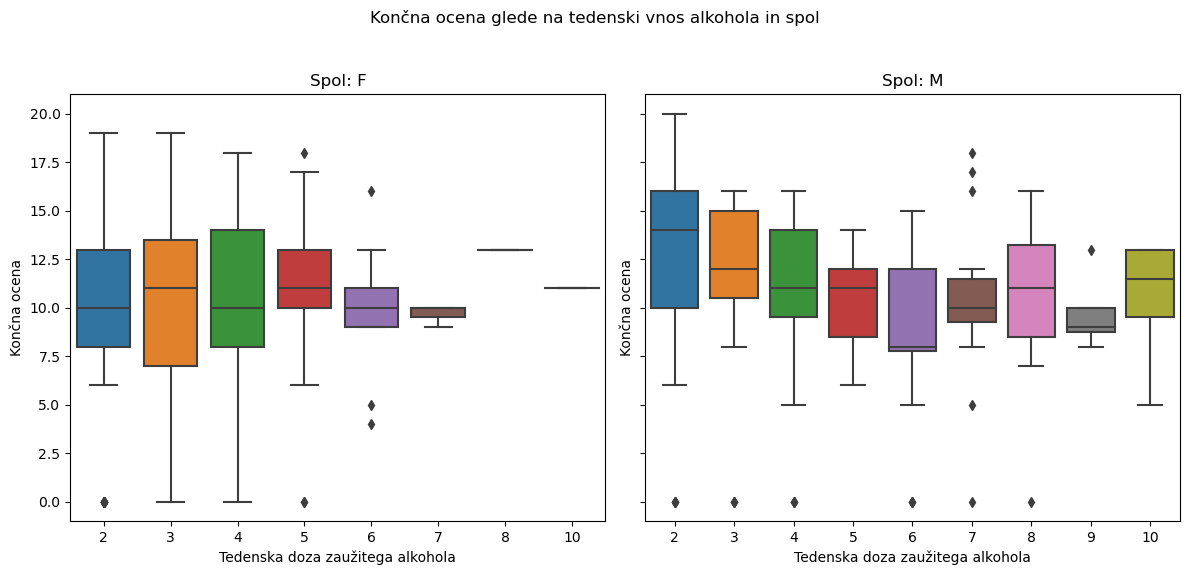

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predpostavimo, da imate stolpec 'sex', ki že vsebuje podatke o spolu ('F' ali 'M')
# in stolpca 'Dalc' in 'Walc' za alkoholni vnos

# Ustvarjanje novega stolpca za skupni tedenski vnos alkohola
data['weekly_alcohol_consumption'] = data['Dalc'] + data['Walc']

# Ustvarjanje grafa
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Končna ocena glede na tedenski vnos alkohola in spol')

# Izris ločenih grafov škatel z brki za vsak spol
for i, sex in enumerate(data['sex'].unique()):
    subset = data[data['sex'] == sex]
    sns.boxplot(x='weekly_alcohol_consumption', y='G3', data=subset, ax=axes[i])
    axes[i].set_title(f'Spol: {sex}')
    axes[i].set_xlabel('Tedenska doza zaužitega alkohola')
    axes[i].set_ylabel('Končna ocena')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Naloga 3
Podatke standardizirajte in naredite indikacijske stolpce za kategorične vrednosti.
- Izpišite število stolpcev.
- Izpišite povprečje stolpca `age`.


In [ ]:
print(data["age"].mean())

16.696202531645568


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()
numericni=data.select_dtypes(include=["number"]).columns
data[numericni]=pd.DataFrame(scaler.fit_transform(data[numericni]))
print(data)

           sex       age address famsize Pstatus      Medu      Fedu  \
student_id                                                             
0            F  0.238380       U     LE3       T  1.143856  0.440257   
1            M -1.330954       R     GT3       T  1.143856  0.440257   
2            M -0.546287       U     LE3       A  1.143856  1.360371   
3            F  0.238380       R     GT3       T  0.229234 -1.399970   
4            F  1.807713       U     GT3       T -2.514630 -1.399970   
...         ..       ...     ...     ...     ...       ...       ...   
390          M -1.330954       U     LE3       A  0.229234 -0.479857   
391          M -1.330954       U     GT3       T  1.143856  1.360371   
392          F  1.807713       U     GT3       T -1.600009 -1.399970   
393          M -0.546287       U     LE3       T -0.685387 -1.399970   
394          M -0.546287       U     GT3       T  1.143856  1.360371   

                Mjob     Fjob      reason  ...  freetime     go

In [ ]:
kategoricni=data.select_dtypes(include=["object"]).columns
print(kategoricni)
data=pd.get_dummies(data, columns=kategoricni)
print(data)

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'school'],
      dtype='object')
                 age      Medu      Fedu  traveltime  studytime  failures  \
student_id                                                                  
0           0.238380  1.143856  0.440257   -0.643249  -0.042286 -0.449944   
1          -1.330954  1.143856  0.440257   -0.643249  -0.042286 -0.449944   
2          -0.546287  1.143856  1.360371   -0.643249  -0.042286 -0.449944   
3           0.238380  0.229234 -1.399970   -0.643249  -0.042286 -0.449944   
4           1.807713 -2.514630 -1.399970   -0.643249  -0.042286  3.589323   
...              ...       ...       ...         ...        ...       ...   
390        -1.330954  0.229234 -0.479857   -0.643249  -0.042286 -0.449944   
391        -1.330954  1.143856  1.360371   -0.643249  -1.235351 -0.449944   
392     

In [ ]:
print(data["age"].mean())
print(data.columns)

1.2816751879216996e-15
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'G3',
       'absences', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'school_GP', 'school_MS'],
      dtype='object')


### Naloga 4
Naredite model regresije z regresijskim naključnim gozdom (s 100 drevesi) na tak način, da razdelite množico na učno (60%) in testno z naključnim zrnom 456. Napovedujete končno oceno učencev, pri tem pa uporabite vse podatke razen vmesnih ocen obeh semestrov.
- Izpišite povprečno absolutno napako zgrajenega modela.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x=data.drop(columns=["G1","G2","G3"])
y=data["G3"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=456)

rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

print(mean_squared_error(y_test,pred))


0.8557695881729521


### Naloga 5
Podrobneje preizkusite algoritem regresije z regresijskim drevesom. Uporabite navzkrižno validacijo s tremi rezi in preizkusite sledečo največjo globino drevesa: 2,3,5,10. Optimizirajte na kvadratno napako.
- Izpišite najboljše parametre algoritma.
- Izpišite najboljšo kvadratno napako.


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold


x=data.drop(columns=["G1","G2","G3"])
y=data["G3"]
params={"max_depth":  [2,3,5,10]}
kfold=KFold(n_splits=3)

grid_rf=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=kfold,scoring="neg_mean_squared_error")
grid_rf.fit(x,y)
print(f"RFR: {grid_rf.best_estimator_} {grid_rf.best_params_} {grid_rf.best_score_}")

RFR: RandomForestRegressor(max_depth=10) {'max_depth': 10} -0.7278300465715403
